In [ ]:
pip install plotly


In [ ]:
pip install geopandas


In [ ]:
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
upload = files.upload()

Saving prefeitos_mais_votados_1turno_2020.csv to prefeitos_mais_votados_1turno_2020.csv


In [ ]:
upload = files.upload()

Saving partidos2024.csv to partidos2024.csv


In [ ]:
shapefile = files.upload()

Saving BR_Municipios_2023.zip to BR_Municipios_2023.zip


In [ ]:
df_partidos = pd.read_csv('partidos2024.csv', sep = ';')
df_2020 = pd.read_csv('prefeitos_mais_votados_1turno_2020.csv')
zip_path = 'BR_Municipios_2023.zip'
extract_path = '/content/shapefile'
os.makedirs(extract_path, exist_ok= True)
with ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)
gdf_municipios = gpd.read_file('/content/shapefile/BR_Municipios_2023.shp')



In [ ]:
LOCAL = 'BRASIL'
CARGO = 'PREFEITO'

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NM_URNA_CANDIDATO  5556 non-null   object
 1   NM_MUNICIPIO       5556 non-null   object
 2   CD_MUNICIPIO       5556 non-null   int64 
 3   DS_SIT_TOT_TURNO   5556 non-null   object
 4   NR_PARTIDO         5556 non-null   int64 
 5   SG_PARTIDO         5556 non-null   object
 6   QT_VOTOS_NOMINAIS  5556 non-null   int64 
 7   Espectro           5556 non-null   object
dtypes: int64(3), object(5)
memory usage: 347.4+ KB


In [ ]:
df_partidos.info()


NameError: name 'gdf_partidos' is not defined

In [ ]:
gdf_municipios.info()
gdf_municipios.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_MUN      5572 non-null   object  
 1   NM_MUN      5572 non-null   object  
 2   CD_RGI      5570 non-null   object  
 3   NM_RGI      5570 non-null   object  
 4   CD_RGINT    5570 non-null   object  
 5   NM_RGINT    5570 non-null   object  
 6   CD_UF       5570 non-null   object  
 7   NM_UF       5570 non-null   object  
 8   CD_REGIAO   5570 non-null   object  
 9   NM_REGIAO   5570 non-null   object  
 10  CD_CONCURB  660 non-null    object  
 11  NM_CONCURB  660 non-null    object  
 12  AREA_KM2    5572 non-null   float64 
 13  geometry    5572 non-null   geometry
dtypes: float64(1), geometry(1), object(12)
memory usage: 609.6+ KB


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,CD_CONCURB,NM_CONCURB,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,7067.127,"POLYGON ((-61.93075 -11.97349, -61.93234 -11.9..."
1,1100023,Ariquemes,110002,Ariquemes,1101,Porto Velho,11,Rondônia,1,Norte,None,None,4426.143,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,1314.352,"POLYGON ((-60.56035 -13.32206, -60.52518 -13.3..."
3,1100049,Cacoal,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,3793.000,"POLYGON ((-61.00075 -11.25298, -61.0008 -11.29..."
4,1100056,Cerejeiras,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,None,None,2783.297,"POLYGON ((-60.82068 -13.11944, -60.81773 -13.1..."


In [ ]:
df_votos_partido_2020 = df_2020.merge(df_partidos, left_on = 'NR_PARTIDO', right_on = 'NR_PARTIDO')
df_votos_partido_2020.head()
df_votos_partido_2020 = df_votos_partido_2020.drop(['Espectro_x', 'SG_PARTIDO_y', 'SG_PARTIDO_TR', 'SG_PARTIDO_x'], axis=1)
df_votos_partido_2020.head()
df_votos_partido_2020 = df_votos_partido_2020[df_votos_partido_2020['DS_SIT_TOT_TURNO'] == 'ELEITO']
df_votos_partido_2020.head()

,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,QT_VOTOS_NOMINAIS,Espectro_y
1,PAULO SERRA,SANTO ANDRÉ,70572,ELEITO,45,266591,centro
2,ORLANDO MORANDO,SÃO BERNARDO DO CAMPO,70750,ELEITO,45,261761,centro
3,FELICIO,SÃO JOSÉ DOS CAMPOS,70998,ELEITO,45,204800,centro
4,ALVARO DIAS,NATAL,17612,ELEITO,45,194764,centro
5,RUBENS FURLAN,BARUERI,62138,ELEITO,45,145377,centro


In [ ]:
gdf_municipios['NM_MUN'] = gdf_municipios['NM_MUN'].str.upper()
gdf_merged = gdf_municipios.merge(df_votos_partido_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO', how='left')
gdf_merged.head()



,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,CD_REGIAO,NM_REGIAO,...,NM_CONCURB,AREA_KM2,geometry,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,QT_VOTOS_NOMINAIS,Espectro_y
0,1100015,ALTA FLORESTA D'OESTE,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,...,None,7067.127,"POLYGON ((-61.93075 -11.97349, -61.93234 -11.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1100023,ARIQUEMES,110002,Ariquemes,1101,Porto Velho,11,Rondônia,1,Norte,...,None,4426.143,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",CARLA REDANO,ARIQUEMES,78.0,ELEITO,51.0,13345.0,direita
2,1100031,CABIXI,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,...,None,1314.352,"POLYGON ((-60.56035 -13.32206, -60.52518 -13.3...",IZAEL,CABIXI,450.0,ELEITO,11.0,2242.0,direita
3,1100049,CACOAL,110005,Cacoal,1102,Ji-Paraná,11,Rondônia,1,Norte,...,None,3793.000,"POLYGON ((-61.00075 -11.25298, -61.0008 -11.29...",ADAILTON FURIA,CACOAL,94.0,ELEITO,55.0,25791.0,direita
4,1100056,CEREJEIRAS,110006,Vilhena,1102,Ji-Paraná,11,Rondônia,1,Norte,...,None,2783.297,"POLYGON ((-60.82068 -13.11944, -60.81773 -13.1...",LISETE MARTH,CEREJEIRAS,272.0,ELEITO,43.0,3741.0,esquerda


<Axes: title={'center': 'Espectro Mais Votado 2020'}>

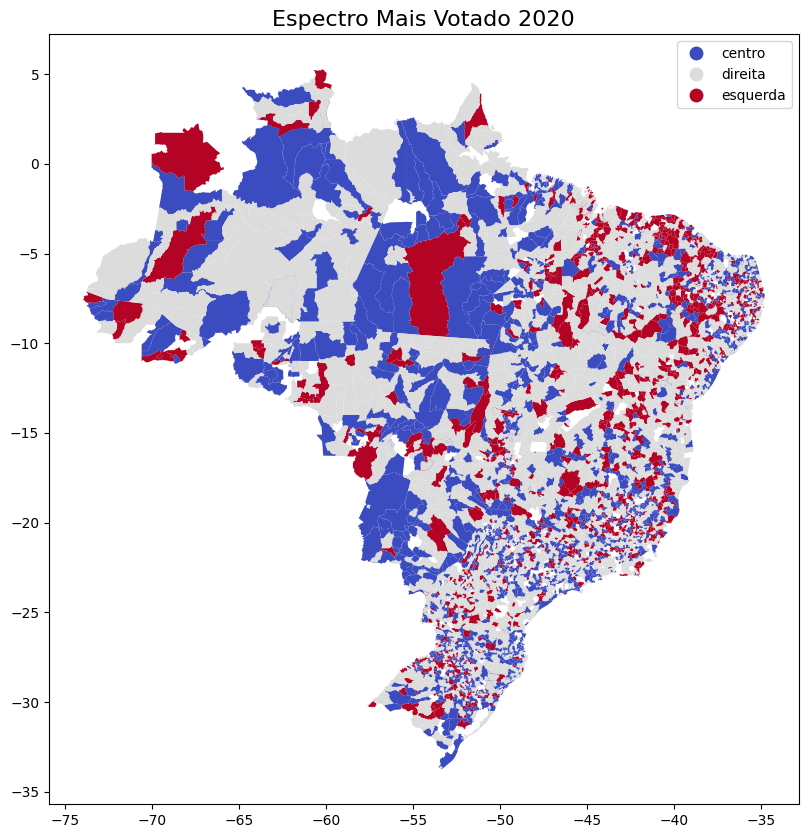

In [ ]:
gdf_merged.set_geometry('geometry', inplace=True)
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title(f'Espectro Mais Votado 2020', color='black', size=16)
gdf_merged.plot(column='Espectro_y', ax=ax, cmap='coolwarm', legend=True)
